<a href="https://colab.research.google.com/github/KunalGupta28/Proximity-Detection-and-Contact-Prediction-using-DBSCAN-and-KMeans-Clustering/blob/main/First_Proejct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score

In [50]:
# 1. Load Data
df = pd.read_json('livedata.json')


In [51]:
# Convert 'latitude' and 'longitude' to float (they are string in JSON)
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)


In [52]:
print("Sample Data:\n", df.head())

Sample Data:
       id           timestamp   latitude  longitude
0  David 2020-07-04 15:35:30  13.148953  77.593651
1  David 2020-07-04 16:35:30  13.222397  77.652828
2  Frank 2020-07-04 14:35:30  13.236507  77.693792
3  Carol 2020-07-04 21:35:30  13.163716  77.562842
4   Ivan 2020-07-04 22:35:30  13.232095  77.580273


In [54]:
coords = np.radians(df[['latitude', 'longitude']])

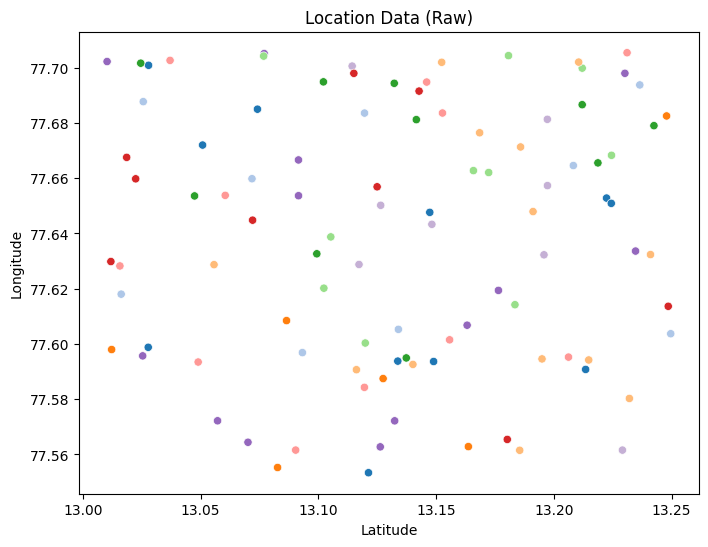

In [63]:
# 2. Scatter Plot of Raw Data
plt.figure(figsize=(8,6))
sns.scatterplot(x="latitude", y="longitude", data=df, hue="id", palette='tab20', legend=False)
plt.title("Location Data (Raw)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()


In [64]:
# 3. DBSCAN Clustering
coords = np.radians(df[['latitude', 'longitude']])
epsilon_km = 0.5
earth_radius_km = 6371.0
epsilon = epsilon_km / earth_radius_km

In [65]:
dbscan_model = DBSCAN(eps=epsilon, min_samples=3, metric='haversine')
dbscan_model.fit(coords)
df['dbscan_cluster'] = dbscan_model.labels_


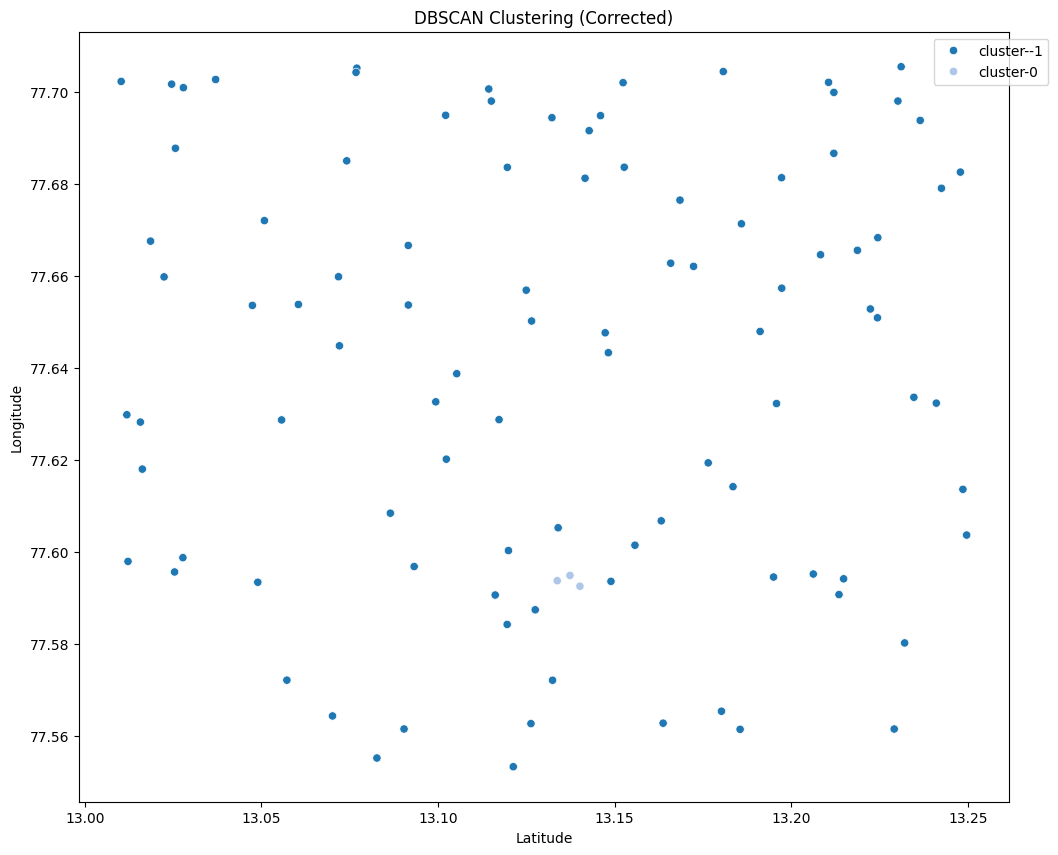

In [66]:
# DBSCAN Cluster Plot
plt.figure(figsize=(12,10))
sns.scatterplot(x='latitude', y='longitude',
                hue=['cluster-{}'.format(x) for x in df['dbscan_cluster']],
                palette='tab20', data=df)
plt.title('DBSCAN Clustering (Corrected)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [67]:
# 4. KMeans Clustering for Comparison
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(df[['latitude', 'longitude']])
df['kmeans_cluster'] = kmeans_model.labels_


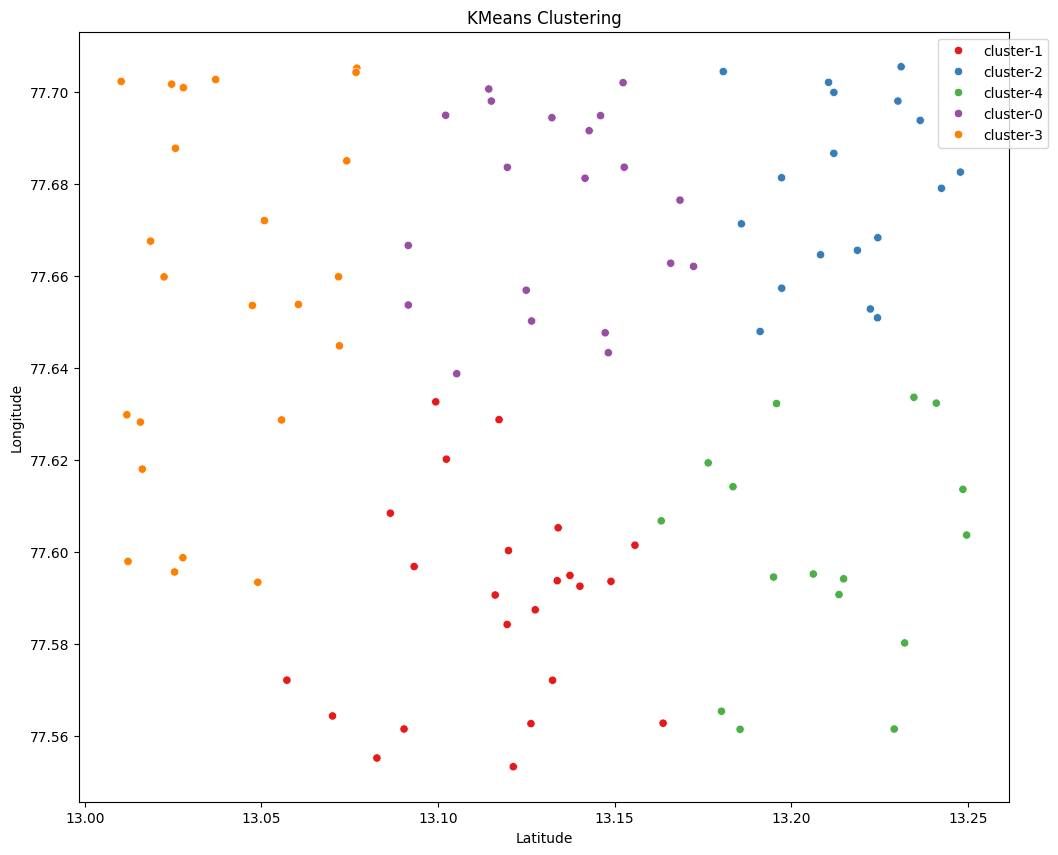

In [68]:
# KMeans Cluster Plot
plt.figure(figsize=(12,10))
sns.scatterplot(x='latitude', y='longitude',
                hue=['cluster-{}'.format(x) for x in df['kmeans_cluster']],
                palette='Set1', data=df)
plt.title('KMeans Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [69]:
# 5. Clustering Quality Comparison
kmeans_score = silhouette_score(df[['latitude', 'longitude']], df['kmeans_cluster'])
print("Silhouette Score for KMeans Clustering: {:.3f}".format(kmeans_score))

Silhouette Score for KMeans Clustering: 0.405


In [70]:
# 6. Function to Get Possible Infected People (Cluster Neighbors from DBSCAN)
def get_infected_names(input_name):
    infected_names = []
    person_clusters = df.loc[df['id'] == input_name, 'dbscan_cluster'].values

    for cluster_label in person_clusters:
        if cluster_label != -1:
            cluster_members = df.loc[df['dbscan_cluster'] == cluster_label, 'id'].values
            for member in cluster_members:
                if member != input_name and member not in infected_names:
                    infected_names.append(member)
    return infected_names

print("\nPossible contacts near 'Erin':", get_infected_names("Erin"))



Possible contacts near 'Erin': ['Ivan', 'David']


In [71]:
# 7. Prediction using KMeans (New Point Example)
new_point = np.array([[13.15, 77.65]])  # Example: new GPS location

In [72]:
predicted_kmeans_cluster = kmeans_model.predict(new_point)
print("\nKMeans Prediction for New Point {}: Cluster-{}".format(new_point.tolist(), predicted_kmeans_cluster[0]))



KMeans Prediction for New Point [[13.15, 77.65]]: Cluster-0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [73]:

# 8. DBSCAN Limitation Notice
print("\nNote: DBSCAN cannot predict cluster of new points directly as it is not a centroid-based algorithm.")


Note: DBSCAN cannot predict cluster of new points directly as it is not a centroid-based algorithm.
